In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [38]:
class System:
    def __init__(self, n, lim):
        self.n = n
        self.lim = lim
        self.data = [0]*len(lim)
    
    def run_loop(self):
        for i in range(self.n):
            num = random.choice(self.lim)
            self.data[num-1] += 1
    
    def make_graph(self):
        plt.bar(self.lim, self.data)
        plt.show()

    def cal_expVal(self):
        self.exp_val = 0
        for j in range(len(self.lim)):
            self.exp_val += self.data[j]*self.lim[j]

        self.exp_val /= self.n

        return self.exp_val

In [48]:
expVal_ls = []
n_ls = []

for k in range(5000):
    s = System(k+1, [1, 2, 3, 4, 5, 6])
    s.run_loop()
    expVal_ls.append(s.cal_expVal())
    n_ls.append(k+1)

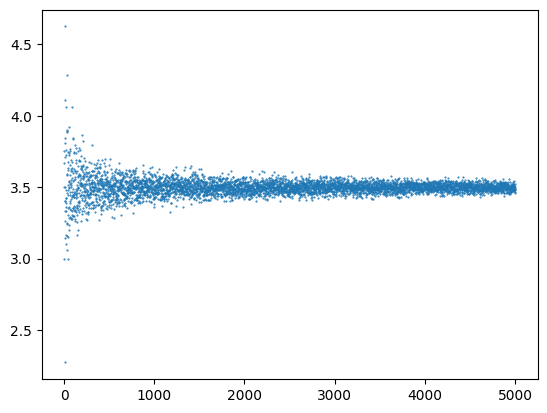

In [49]:
plt.scatter(n_ls, expVal_ls, s=0.25)
plt.show()

#HW
dice = 3
เล่นครั้งละ 1 บาท
เรียง 6 บาท 24 sol
ตอง 12 บาท 6 sol
เล่นไป 1 ล้านรอบ
ค่าคาดหวังของเงินที่ได้

In [61]:
class DiceGame:
    def __init__(self):
        self.n_dice = 3
        self.ns = 6**3
        self.pocket = 0
        self.money = [0, 0, 0] #[-1, 6, 12]
    
    def isInOrder(self, ls):
        ls.sort()
        if(ls[0]+1 == ls[1]) and (ls[1]+1 == ls[2]):
            self.pocket += 6
            self.money[1] += 1
    
    def isAllSame(self, ls):
        if(ls[0]==ls[1]) and (ls[0] == ls[2]):
            self.pocket += 12
            self.money[2] += 1

    def run_loop(self):
        num1, num2, num3 = random.randint(1, 6), random.randint(1, 6), random.randint(1, 6)
        turn = [num1, num2, num3]
        self.pocket -= 1
        self.money[0] += 1
        self.isInOrder(turn)
        self.isAllSame(turn)

    def calExpVal(self, x):
        self.expVal = 0
        self.allPos = [-1, 6, 12]
        for u in range(len(self.money)):
            self.expVal += self.allPos[u]*self.money[u]
        self.expVal /= x


In [62]:
dg = DiceGame()
exp_val_ls = []
pocket_ls = []
k_ls = []

for x in range(1, 100000):
    dg.run_loop()
    dg.calExpVal(x)
    exp_val_ls.append(dg.expVal)
    k_ls.append(x)
    pocket_ls.append(dg.pocket)

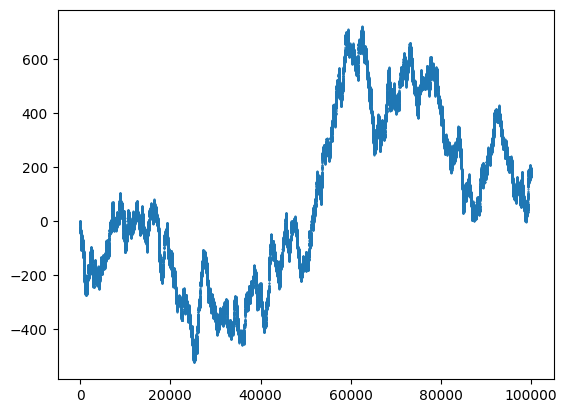

In [63]:
plt.scatter(k_ls, pocket_ls, s=0.25)

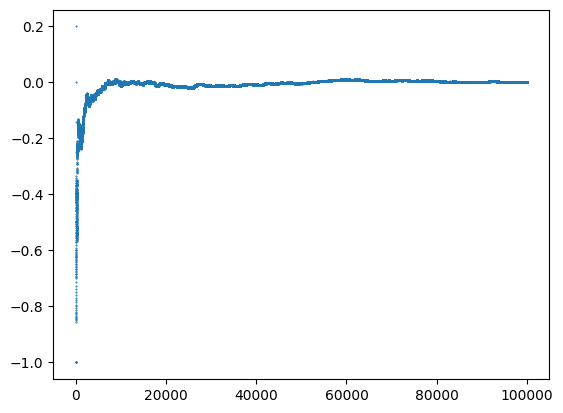

In [64]:
plt.scatter(k_ls, exp_val_ls, s=0.25)

Photocard BNK รุ่น 1 มี 22 คน 1 คน มี 3 act
1 pack มี 5 รูป
สุ่ม กี่ชุด ถึงจะครบ 1 com(3 act 1 mem)

In [111]:
class FindSol:
    def __init__(self):
        self.n_member = 22
        self.all_photo = [0]*66
        self.ns = 8936928 #66 เลือก 5
        self.n=0
        self.isCom = 0
        
    def checkCom(self):
        i=0
        for a in range(22):
            b = a*3
            if (self.all_photo[b]) and (self.all_photo[b+1]>0) and (self.all_photo[b+2]>0):
                self.isCom=1
                break

    def run_loop(self):
        #1pack 5 card rand member rand act
        self.n += 1
        for m in range(5):
            mem = random.randint(0, 65)
            self.all_photo[mem]+=1
        self.checkCom()

In [124]:
nLs = []
n_all = 0
xLs = []
for t in range(10000):
    fs = FindSol()
    while(fs.isCom != 1):
        fs.run_loop()
    nLs.append(fs.n)
    n_all+=fs.n
    xLs.append(t+1)


In [120]:
n_all/10000

5.605